# @author : 20BAI10040 Shankar Lohar Challenging TASK 1

# Image Cartoonifier with OpenCV python

## ( Input: Your Photo, Output: Cartoon Image of yours)


In [5]:
# Required Imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Loading Images
def read_file(filename):
    image = cv2.imread(filename)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(originalImage)
    plt.title("Original Image")
    plt.show()
    return image

In [7]:
filename = 'ShankarLohar20BAI10040.jpg'

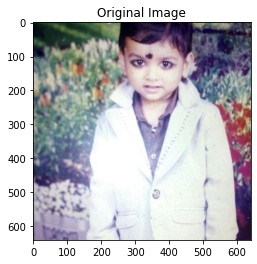

In [8]:
originalImage = read_file(filename)

In [9]:
# Create Edge Mask
def edge_mark(image, line_size, blur_value):
    """
    input : Input Image
    Output : Edges of Images
    """
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    gray_blur = cv2.medianBlur(gray, blur_value)

    edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)
    return edges

In [10]:
line_size, blur_value = 7, 7
imageEdges = edge_mark(originalImage, line_size, blur_value)

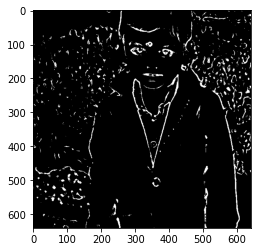

In [11]:
plt.imshow(imageEdges, cmap='binary')
plt.show()

In [12]:
# Reduce the Color Palette
def color_quantization(image, no_of_colors):
    # Transform the image
    data = np.float32(image).reshape((-1, 3))
    # Determine Criteria
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)

    # Implementing K-Means
    ret, label, center = cv2.kmeans(data, no_of_colors, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    result = center[label.flatten()]
    result = result.reshape(image.shape)

    return result

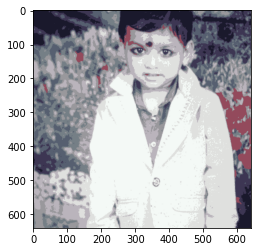

In [13]:

colorQuantizedImage = color_quantization(originalImage, no_of_colors=9)
plt.imshow(colorQuantizedImage)
plt.show()

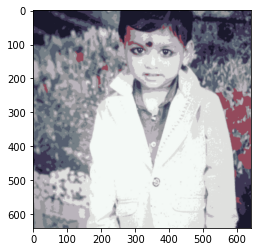

In [14]:
# Reducing the noise
blurredImage = cv2.bilateralFilter(colorQuantizedImage, d=3, sigmaColor=200, sigmaSpace=200)


plt.imshow(blurredImage)
plt.show()

In [15]:
# Combine Edge Mask With The Quantized Image
def cartoonify():
    c = cv2.bitwise_and(blurredImage, blurredImage, mask=imageEdges)
    plt.imshow(c)
    plt.title("Cartoonified Image")
    plt.show()

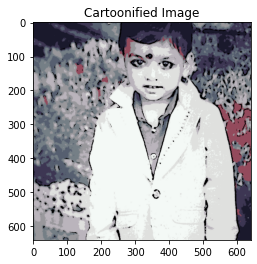

In [16]:
cartoonify()

# 20BAI10040 Shankar Lohar - Computer Vision